#Netflix project

In [3]:
#importing the necessary libraries for importing the dataset in jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Reading dataset file
netflix_data = pd.read_csv('/content/drive/MyDrive/Datasets/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_data.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [6]:
netflix_data.dtypes


Cust_Id     object
Rating     float64
dtype: object

In [7]:
netflix_data.shape

(24058263, 2)

In [8]:
#Finding how many people have rated the movies as 1, 2, 3, 4, 5 stars.

count_rating = netflix_data.groupby("Rating").size().reset_index(name = "count")
count_rating

,Rating,count
0,1.0,1118186
1,2.0,2439073
2,3.0,6904181
3,4.0,8085741
4,5.0,5506583


In [9]:
#Claculating how many movies we are having in the dataset
movie_count=netflix_data.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [10]:
movie_count=netflix_data.isnull().sum()[1]
movie_count

4499

In [11]:
#getting the customer count
customer_count=netflix_data['Cust_Id'].nunique()

In [12]:
customer_count

475257

In [13]:
#without NaN values
customer_count=netflix_data['Cust_Id'].nunique()-movie_count
customer_count

470758

In [14]:
#get the total number of ratings given by the customers
rating_count=netflix_data['Cust_Id'].count()-movie_count
rating_count

24053764

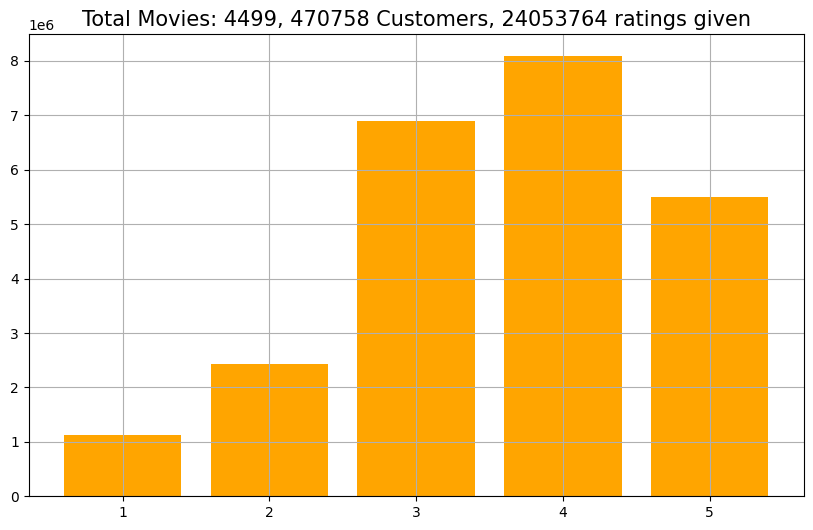

In [15]:
# ax=count_rating.plot(kind='bar', legend=False, figsize=(10,5))
plt.figure(figsize = (10,6))
plt.bar(count_rating["Rating"], count_rating["count"],color = 'orange')
plt.title(f'Total Movies: {movie_count}, {customer_count} Customers, {rating_count} ratings given', fontsize=15)
plt.grid(True)
plt.show()

Adding another column that will have movie id
first of all I will be calculating how many null are there in the ratings column

In [16]:
df_nan=pd.DataFrame(pd.isnull(netflix_data.Rating))

In [17]:
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [18]:
df_nan=df_nan[df_nan['Rating']==True]

In [19]:
df_nan.shape

(4499, 1)

In [20]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [21]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [22]:
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [23]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [24]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [25]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 548 to 693 and so on
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_data)-df_nan.iloc[-1,0]-1), movie_id)#movie id will be 4499
movie_np=np.append(movie_np, last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [28]:
netflix_data=netflix_data[pd.notnull(netflix_data['Rating'])]
netflix_data['Movie_Id']=movie_np.astype(int)
netflix_data['Cust_Id']=netflix_data['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_data.head()

Now the dataset will look like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [29]:
# # Chain data cleaning and transformation operations
# netflix_data = (
#     netflix_data.dropna(subset=['Rating'])  # Remove rows with missing 'Rating' values
#     .assign( Movie_Id=movie_np.astype(int),  # Add 'Movie_Id' column
#     Cust_Id=netflix_data['Cust_Id'].astype(int)  # Convert 'Cust_Id' to integers
#     )
# )

# # Display the first few rows of the modified DataFrame
# print("Now the dataset looks like:")
# print(netflix_data.head())

Now I will remove all the users that have rated less movies and
also all those movies that has been rated less in numbers

In [30]:
dataset_movie_summary=netflix_data.groupby('Movie_Id')['Rating'].agg(['count', 'mean'])

In [31]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [32]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [33]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [34]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [35]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [36]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_data.groupby('Cust_Id')['Rating'].agg(['count', 'mean'])
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [37]:
dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [38]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [39]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [40]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_data.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [41]:
netflix_data=netflix_data[~netflix_data['Movie_Id'].isin(drop_movie_list)]
netflix_data=netflix_data[~netflix_data['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_data.shape))

After the triming, the shape is: (17337458, 3)


In [42]:
netflix_data.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [43]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
df_p = pd.pivot_table(netflix_data, values='Rating', index='Cust_Id', columns='Movie_Id')
print(df_p.shape)

(143458, 1350)


In [45]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_title=pd.read_csv('/content/drive/MyDrive/Datasets/movie_titles.csv', encoding='ISO-8859-1', header=None, names=['Movie_Id','Year','Name'], error_bad_lines=False)
df_title.set_index('Movie_Id', inplace=True)

<ipython-input-50-81414578a87e>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_title=pd.read_csv('/content/drive/MyDrive/Datasets/movie_titles.csv', encoding='ISO-8859-1', header=None, names=['Movie_Id','Year','Name'], error_bad_lines=False)
Skipping line 72: expected 3 fields, saw 4
Skipping line 264: expected 3 fields, saw 5
Skipping line 350: expected 3 fields, saw 4
Skipping line 366: expected 3 fields, saw 4
Skipping line 394: expected 3 fields, saw 4
Skipping line 466: expected 3 fields, saw 4
Skipping line 582: expected 3 fields, saw 4
Skipping line 600: expected 3 fields, saw 4
Skipping line 670: expected 3 fields, saw 4
Skipping line 672: expected 3 fields, saw 4
Skipping line 729: expected 3 fields, saw 4
Skipping line 776: expected 3 fields, saw 4
Skipping line 827: expected 3 fields, saw 4
Skipping line 834: expected 3 fields, saw 4
Skipping line 891: expected 3 fields, saw 4

In [51]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [52]:
#model building
!pip install scikit-surprise
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156227 sha256=3a40e1852776d5995a6301a33ade00ea9d132bd22e61b0e61d1f36be5fd9b48d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [53]:
#help us to read the dataset for svd algo
reader=Reader()

In [54]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_data[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [55]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3, verbose=True)
#for 1st fold- 1,2,3,4,5

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9896  0.9984  0.9997  0.9959  0.0045  
MAE (testset)     0.7941  0.8008  0.7942  0.7964  0.0031  
Fit time          4.59    1.43    1.38    2.47    1.50    
Test time         0.19    0.33    0.31    0.27    0.06    


{'test_rmse': array([0.98960925, 0.99837645, 0.99973867]),
 'test_mae': array([0.79413914, 0.80082531, 0.79415989]),
 'fit_time': (4.591934442520142, 1.4269609451293945, 1.3844878673553467),
 'test_time': (0.18827533721923828, 0.32574963569641113, 0.3079566955566406)}

In [56]:
netflix_data.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [57]:
#so first we take user 712664 and we try to recommend some movies based on the past data
dataset_712664=netflix_data[(netflix_data['Cust_Id'] ==712664)& (netflix_data['Rating']==5)]
dataset_712664=dataset_712664.set_index('Movie_Id')
dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

Movie_Id
3                       Character
79                    The Killing
175                Reservoir Dogs
199               The Deer Hunter
241            North by Northwest
                  ...            
3887    Aguirre: The Wrath of God
4109              American Psycho
4266    The Passion of the Christ
4384             Dawn of the Dead
4392             Army of Darkness
Name: Name, Length: 84, dtype: object

In [58]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [59]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [60]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17429,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17430,17767,2004.0,Fidel Castro: American Experience
17431,17768,2000.0,Epoch
17432,17769,2003.0,The Company


In [61]:
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate#k-fold

In [63]:
#now we will train our algorithm with the whole dataset
data=Dataset.load_from_df(netflix_data[['Cust_Id','Movie_Id','Rating']], reader)

In [64]:
#building the trainset using surprise package
trainset=data.build_full_trainset()
svd.fit(trainset)

In [65]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-65-42d8450a9196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


In [66]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664.head(10))

        Year                                Name  Estimate_Score
1574  2000.0                  Dungeons & Dragons        1.032298
358   2000.0  The Flintstones in Viva Rock Vegas        1.036180
4049  1994.0                     The Flintstones        1.076881
4058  1993.0    Teenage Mutant Ninja Turtles III        1.118792
1263  1990.0              Look Who's Talking Too        1.144754
2361  1992.0      Home Alone 2: Lost in New York        1.256089
286   1998.0                        The Avengers        1.330465
3505  1993.0                      Cop and a Half        1.339324
2238  1998.0                         Spice World        1.339607
1122  2001.0                 The Wedding Planner        1.346893


In [67]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

        Year                            Name  Estimate_Score
4270  2002.0  Curb Your Enthusiasm: Season 3        5.000000
2067  1994.0          The Simpsons: Season 6        5.000000
711   2003.0              The Wire: Season 1        5.000000
2809  1996.0             Babylon 5: Season 4        5.000000
173   1992.0                  Reservoir Dogs        5.000000
857   1954.0                   Seven Samurai        5.000000
4105  1989.0  The Kids in the Hall: Season 1        4.973607
3815  1972.0       Aguirre: The Wrath of God        4.966984
1597  1986.0     Aliens: Collector's Edition        4.953303
762   2003.0              Foyle's War: Set 2        4.950288


#Result

I have sucessfully created a recommondation system and recommonded the top 10 movies for user_712664.